In [68]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("data.csv")

# Data Cleaning & Vectorization

In [69]:
# clean individual columns: regexp replace
df = df.replace('\sand\s|[-\s&]','', regex=True)
str_cols = ['artist','title']
df[str_cols] = df[str_cols].apply(lambda x: x.str.lower())

# append all columns
def get_non_null(x):
    l = set(sorted([str(v).lower() for v in x if v != None]))
    l = [x for x in l if x != 'nan']
    if l:
        return ' '.join(list(l))
    else:
        return ''
    
df['string_cols'] = df[str_cols].apply(lambda x:get_non_null(x), axis=1)
vectorizer = CountVectorizer()
vectorizer.fit(df['string_cols'])

# Encode the Document
vec = vectorizer.transform(df['string_cols']).toarray()
vec_sum = np.sum(vec, axis=1)

# add to df
tmp = pd.DataFrame(vec.tolist(), columns=[f'V{x}' for x in range(vec.shape[1])])
#tmp['vec_len'] = vec_sum
new_df = pd.concat([df[['price','date','dimensions_h','dimensions_l']], tmp], axis = 1)


# NN model

In [70]:
# split into input (X) and output (y) variables
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train, X_val, Y_train, Y_val = train_test_split(X_scale, y, test_size=0.3)


In [71]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(80,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [75]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

In [76]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
2/2 [==============================] - 1s 114ms/step - loss: 4677312800882688.0000 - mean_squared_error: 4677312800882688.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 4677312264011776.0000 - mean_squared_error: 4677312264011776.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 4677312264011776.0000 - mean_squared_error: 4677312264011776.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 4677312800882688.0000 - mean_squared_error: 4677312800882688.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 4677311727140864.0000 - mean_squared_error: 467

2/2 [==============================] - 0s 21ms/step - loss: 4677312264011776.0000 - mean_squared_error: 4677312264011776.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 39/100
2/2 [==============================] - 0s 21ms/step - loss: 4677311190269952.0000 - mean_squared_error: 4677311190269952.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 40/100
2/2 [==============================] - 0s 23ms/step - loss: 4677311727140864.0000 - mean_squared_error: 4677311727140864.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 41/100
2/2 [==============================] - 0s 21ms/step - loss: 4677312264011776.0000 - mean_squared_error: 4677312264011776.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 42/100
2/2 [==============================] - 0s 23ms/step - loss: 4677312264011776.0000 - mean_squared_error: 467731226401

2/2 [==============================] - 0s 21ms/step - loss: 4677311727140864.0000 - mean_squared_error: 4677311727140864.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 76/100
2/2 [==============================] - 0s 20ms/step - loss: 4677312264011776.0000 - mean_squared_error: 4677312264011776.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 77/100
2/2 [==============================] - 0s 21ms/step - loss: 4677312264011776.0000 - mean_squared_error: 4677312264011776.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 78/100
2/2 [==============================] - 0s 21ms/step - loss: 4677311727140864.0000 - mean_squared_error: 4677311727140864.0000 - val_loss: 2239348703494144.0000 - val_mean_squared_error: 2239348703494144.0000
Epoch 79/100
2/2 [==============================] - 0s 20ms/step - loss: 4677312264011776.0000 - mean_squared_error: 467731226401

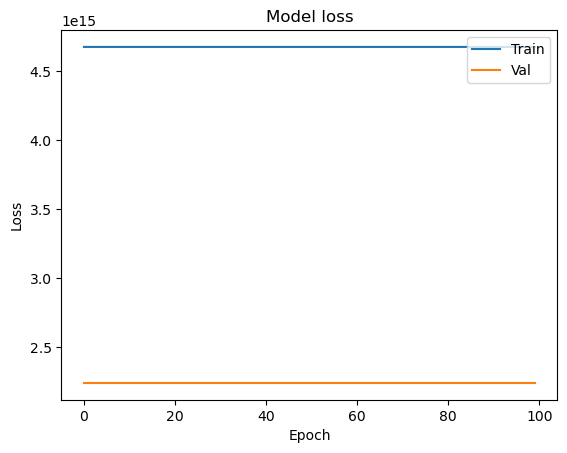

In [77]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

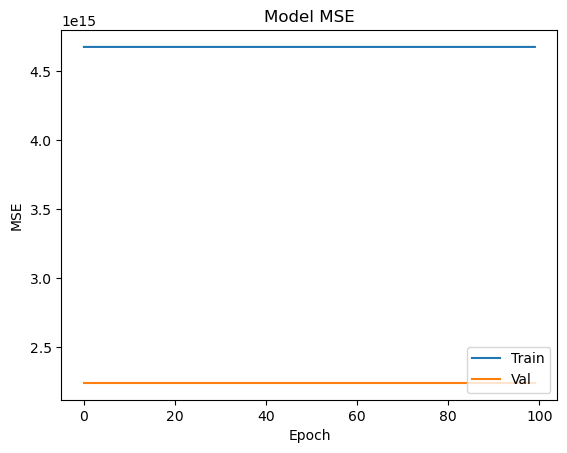

In [78]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()